In [1]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import mediapipe as mp

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
actions = ['SkateBoarding-Front']
DATAPATH = os.path.join('landmarks')
label_map = {label:num for num, label in enumerate(actions)}


In [3]:
label_map

{'SkateBoarding-Front': 0}

In [4]:
# actions = ['SkateBoarding-Front', 'Run-Side']
# actions = ['SkateBoarding-Front']

sequences, labels = [], []
for action in actions:
    path = os.path.join(DATAPATH, action)
    for num in os.listdir(path):
        pathNum = os.path.join(path, num)
        window = []
        print(num)
        for frame_num in os.listdir(pathNum):

            print(frame_num)
            res = np.load(os.path.join(pathNum, frame_num))
            window.append(res)
        # break
        print(sequences)
        sequences.append(window)
        labels.append(label_map[action])

012
1058-22059.npy
1058-22065.npy
1058-22015.npy
1058-22056.npy
1058-22062.npy
1058-22051.npy
1058-22025.npy
1058-22005.npy
1058-22042.npy
1058-22058.npy
1058-22016.npy
1058-22037.npy
1058-22021.npy
1058-22034.npy
1058-22068.npy
1058-22053.npy
1058-22050.npy
1058-22048.npy
1058-22070.npy
1058-22004.npy
1058-22040.npy
1058-22028.npy
1058-22063.npy
1058-22008.npy
1058-22071.npy
1058-22010.npy
1058-22013.npy
1058-22020.npy
1058-22024.npy
1058-22036.npy
1058-22003.npy
1058-22041.npy
1058-22069.npy
1058-22060.npy
1058-22012.npy
1058-22045.npy
1058-22033.npy
1058-22018.npy
1058-22044.npy
1058-22007.npy
1058-22046.npy
1058-22049.npy
1058-22057.npy
1058-22038.npy
1058-22064.npy
1058-22054.npy
1058-22032.npy
1058-22029.npy
1058-22017.npy
1058-22031.npy
1058-22019.npy
1058-22022.npy
1058-22067.npy
1058-22009.npy
1058-22006.npy
1058-22014.npy
1058-22039.npy
1058-22011.npy
1058-22061.npy
1058-22043.npy
1058-22047.npy
1058-22023.npy
1058-22027.npy
1058-22030.npy
1058-22052.npy
1058-22026.npy
1058-2

In [5]:
# len(sequences)
np.array(sequences).shape
# np.array(labels[1:]).shape

(12, 70, 1662)

In [6]:

X = np.array(sequences)
y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [7]:
X_train.shape

(11, 70, 1662)

In [8]:
X_train.shape[1:]


(70, 1662)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

from keras import regularizers



In [10]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [16]:

actions = np.array(actions)

early_stopping_callback = EarlyStopping(monitor = 'loss', patience = 10, mode = 'min', restore_best_weights = True)
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', kernel_regularizer='l1',
                 input_shape= (70,1662)))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True, activation='relu' ,  kernel_regularizer='l1'
         ))
#kernel_regularizer=regularizers.l1(0.01)
model.add(LSTM(32, return_sequences=True, activation='relu' ))
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())


model.add(LSTM(actions.shape[0], activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),'accuracy'])
# model.summary()
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), verbose=2, shuffle = True, callbacks=[tb_callback])



Epoch 1/15
1/1 - 3s - loss: 244.3881 - binary_crossentropy: 0.5497 - accuracy: 0.0000e+00 - val_loss: 235.7514 - val_binary_crossentropy: 0.5322 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 2/15
1/1 - 0s - loss: 235.7441 - binary_crossentropy: 0.5249 - accuracy: 0.0000e+00 - val_loss: 227.3006 - val_binary_crossentropy: 0.5316 - val_accuracy: 0.0000e+00 - 278ms/epoch - 278ms/step
Epoch 3/15
1/1 - 0s - loss: 227.2961 - binary_crossentropy: 0.5270 - accuracy: 0.1818 - val_loss: 219.0282 - val_binary_crossentropy: 0.5310 - val_accuracy: 0.0000e+00 - 282ms/epoch - 282ms/step
Epoch 4/15
1/1 - 0s - loss: 219.0056 - binary_crossentropy: 0.5084 - accuracy: 0.1818 - val_loss: 210.9538 - val_binary_crossentropy: 0.5304 - val_accuracy: 0.0000e+00 - 283ms/epoch - 283ms/step
Epoch 5/15
1/1 - 0s - loss: 210.8976 - binary_crossentropy: 0.4742 - accuracy: 0.2727 - val_loss: 203.0515 - val_binary_crossentropy: 0.5298 - val_accuracy: 0.0000e+00 - 296ms/epoch - 296ms/step
Epoch 6/15
1/1 - 0s - l

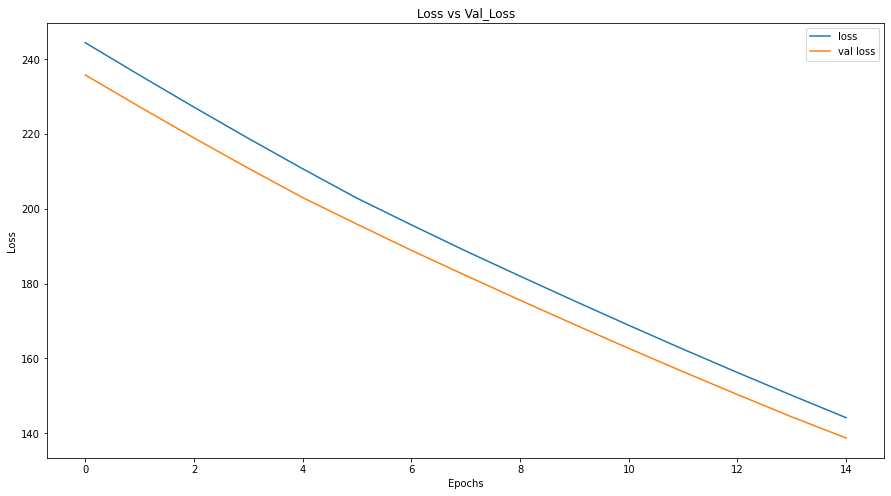

In [12]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [13]:

model_json = model.to_json()
with open("actions.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights('actions.h5')


In [14]:
from numba import cuda
cuda.select_device(0)
cuda.close()